# Práctica 3: Representación del conocimiento

__Fecha de entrega: 8 de mayo de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de Representación de conocimiento. La práctica consta de un único notebook que se entregará en la tarea de entrega habilitada en el Campus  Virtual.

Cada consulta debe contener breves comentarios que expliquen cada tripleta. __No se valorarán consultas sin explicaciones__.

__Número de grupo: 13__

__Nombres de los estudiantes: Esther Babon y Claudia López-Mingo Moreno__

## Consultas SPARQL sobre Wikidata.

En esta práctica vamos a usar el [punto de acceso SPARQL](https://query.wikidata.org/) de Wikidata para contestar las preguntas que se formulan a continuación. Cada pregunta debe ser respondida realizando una única consulta SPARQL. Para cada una de las entidades recuperadas se mostrará __tanto su identificador como su etiqueta__ (nombre de la entidad en lenguaje natural). 

Para cada una de las preguntas debes mostrar tanto la consulta como la respuesta obtenida. Si lo consideras necesario, puedes añadir celdas adicionales en formato _Markdown_ para explicar decisiones que hayas tomado al crear la consulta o cualquier otro dato que consideres interesante.
 
Para resolver estas consultas puedes usar __dos recursos que te recomendamos consultar__ son:

- [Este tutorial de SPARQL](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial).
- [Esta recopilación de ejemplos](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples)

In [1]:
## Lo primero sería instalar en tu entorno de Python wdsparql
## Si no lo tienes instalado, puedes hacerlo desde el notebook
import sys

!{sys.executable} -m pip install wdsparql

     |████████████████████████████████| 793 kB 14.4 MB/s 
     |████████████████████████████████| 381 kB 53.6 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [2]:
# Asumimos instalado wdsparql
%load_ext autoreload
%load_ext wdsparql
%autoreload 2

### Ejemplo

Recuperar todas las instancias directas de la clase [Cabra (Q2934)](https://www.wikidata.org/wiki/Q2934) que aparecen en la base de conocimiento.

In [3]:
%%wdsparql
SELECT ?item ?itemLabel 
WHERE 
{
  ?item wdt:P31 wd:Q2934.  # instancias directas de la clase Cabra
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

,item,itemLabel
0,http://www.wikidata.org/entity/Q151345,Billygoat Hennes
1,http://www.wikidata.org/entity/Q3569037,William Windsor
2,http://www.wikidata.org/entity/Q23003932,His Whiskers
3,http://www.wikidata.org/entity/Q24287064,Taffy
4,http://www.wikidata.org/entity/Q41239734,Lance Corporal Shenkin III
5,http://www.wikidata.org/entity/Q41240892,Lance Corporal Shenkin II
6,http://www.wikidata.org/entity/Q41241416,Lance Corporal Shenkin I


### Consulta 1

[Isaac Asimov (Q34981)](https://www.wikidata.org/wiki/Q34981) fue un escritor y profesor de bioquímica en la Universidad de Boston conocido por ser un prolífico autor de obras de ciencia ficción, historia y divulgación científica. 

Vamos a comenzar por averiguar su fecha y lugar de nacimiento (localidad y país al que pertenece la localidad en la actualidad).

In [4]:
##fecha de nacimiento =  P569  
##lugar de nacimiento = P19
##Isaac Asimov = Q34981
##País = P17
##además sabemos que los items deberían tener como prefijo wd:, y las propiedades wdt:.
%%wdsparql

SELECT ?fecha ?lugar ?lugarLabel ?país ?paísLabel
WHERE
{
    wd:Q34981 wdt:P569 ?fecha;
              wdt:P19 ?lugar.
    ##preguntamos Isaac Asimov nacío en dia ?fecha y lugar ?lugar
     
    ?lugar wdt:P17 ?país.
    ##preguntamos ?lugar a que país pertenece  ?pais 

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". } 
}


,fecha,lugar,lugarLabel,país,paísLabel
0,1920-01-02T00:00:00Z,http://www.wikidata.org/entity/Q1010621,Petrovichi,http://www.wikidata.org/entity/Q159,Russia


### Consulta 2

A continuación vamos a averiguar todas las distintas profesiones (ocupaciones) que se le reconocen en la base de conocimiento. Queremos obtener los resultados ordenados alfabéticamente por el nombre de la profesión.

In [5]:
%%wdsparql
##profesion = Q28640
##Instance of = P31
##subclass of = P279

SELECT ?profesión ?profesiónLabel 
WHERE
{
  ?profesión wdt:P31/wdt:P279* wd:Q28640;
 
 ##buscamos todas las instancias de profesiones y subclases de ellas
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
ORDER BY ASC(?profesiónLabel)

##ordenamos ascendentemente por nombre de la profesión


,profesión,profesiónLabel
0,http://www.wikidata.org/entity/L56475,L56475
1,http://www.wikidata.org/entity/Q100154456,Q100154456
2,http://www.wikidata.org/entity/Q100247281,Q100247281
3,http://www.wikidata.org/entity/Q100427176,Q100427176
4,http://www.wikidata.org/entity/Q1006269,Q1006269
5,http://www.wikidata.org/entity/Q100707292,Q100707292
6,http://www.wikidata.org/entity/Q100707612,Q100707612
7,http://www.wikidata.org/entity/Q100709388,Q100709388
8,http://www.wikidata.org/entity/Q100709388,Q100709388
9,http://www.wikidata.org/entity/Q1009943,Q1009943


### Consulta 3

De todas esas profesiones, ¿cuáles corresponden con subtipos de [Escritor (Q36180)](https://www.wikidata.org/wiki/Q36180)? Ten en cuenta que la jerarquía de tipos de escritores puede ser muy sofisticada.

Puede que [esto](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#Property_paths) te resulte útil.

In [6]:
%%wdsparql
##profesion = Q28640
##subclase de = P279 
##escritor = Q36180

SELECT ?profesión ?profesiónLabel 
WHERE
{ 
    ?profesión wdt:P279 wd:Q36180;
            wdt:P31 wd:Q28640.
        
 ##preguntamos por las  subclases de escritor que sean instancias de profesion 

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}


,profesión,profesiónLabel
0,http://www.wikidata.org/entity/Q49757,poet
1,http://www.wikidata.org/entity/Q175301,speechwriter
2,http://www.wikidata.org/entity/Q333634,translator
3,http://www.wikidata.org/entity/Q381353,woman of letters
4,http://www.wikidata.org/entity/Q623386,ghostwriter
5,http://www.wikidata.org/entity/Q1086863,columnist
6,http://www.wikidata.org/entity/Q1155838,correspondent
7,http://www.wikidata.org/entity/Q1607826,editor
8,http://www.wikidata.org/entity/Q1626130,homme de lettres
9,http://www.wikidata.org/entity/Q1749303,runemaster


### Consulta 4

Asimov se casó más de una vez. Para cada uno de los matrimonios queremos conocer el nombre de la esposa y las fechas de inicio y finalización. Los resultados deben aparecer ordenados cronológicamente.

Para resolver esta consulta necesitarás acceder a los cualificadores de nodos sentencia y necesitarás entender los prefijos que usa Wikidata. Puede que [esto](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#Qualifiers) te resulte útil.

In [7]:
%%wdsparql
##Isaac Asimov = Q34981
##Conyuge = P26
##Fecha inicio = P580
##fecha fin = P580

SELECT ?mujer ?mujerLabel ?fechaInicio ?fechaFin
WHERE
{
     wd:Q34981 p:P26 [
       ##apuntamos al nodo de conyuge de asimov
       ##ya que en el nodo de conyuge se guarda la fecha de inicio y de final de cada
       ps:P26 ?mujer;
       ##la declaración de la propiedad (nodo) es el mismo nombre del conyuge  
       pq:P580 ?fechaInicio; 
       pq:P582 ?fechaFin].
       ##los cualificadores de la propiedad (nodo) son la fecha de inicio y fin
  

 
SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
    

,mujer,mujerLabel,fechaInicio,fechaFin
0,http://www.wikidata.org/entity/Q107693884,Gertrude Asimov,1942-07-26T00:00:00Z,1973-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q517435,Janet Asimov,1973-01-01T00:00:00Z,1992-01-01T00:00:00Z


### Consulta 5

Asimov recibió muchos premios a lo largo de su carrera. Queremos obtener la lista de premios y, para cada uno de ellos, la fecha y la obra por la que fue premiado (si están disponibles). Los resultados se deben mostrar ordenador por fecha.

Puede que [esto](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#OPTIONAL) te resulte útil.

In [9]:
%%wdsparql 
##premio recivido = P166
## Isaac Asimov = Q34981
##fecha en la que ocurrio el evento = P585
##premiado por la obra = P1686



SELECT ?premio ?premioLabel ?fecha ?obra ?obraLabel
WHERE
{
    ## wd:Q34981 p:P166 [
       ##apuntamos al nodo de premio de asimov
       ##ya que en el nodo de premio se guarda la fecha y el nombre de la obra por el que lo gano
      ## ps:P166 ?premio;
       ##la declaración de la propiedad (nodo) es el mismo nombre del premio
       ##pq:P585 ?fecha;
       ##pq:P1686 ?obra ].
       ##los cualificadores de la propiedad (nodo) son la fecha y la obra
  
##para poder añadir optional no podemos usar este formato
 
  wd:Q34981 p:P166 ?premios.
  ?premios ps:P166 ?premio.
 
 OPTIONAL{ ?premios pq:P585 ?fecha. }
 OPTIONAL{ ?premios pq:P1686 ?obra. }

 
SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
} 
ORDER BY (?fecha)
##ordenamos los resultados por fecha



,premio,premioLabel,fecha,obra,obraLabel
0,http://www.wikidata.org/entity/Q61745062,Fellow of the Committee for Skeptical Inquiry,None,None,None
1,http://www.wikidata.org/entity/Q52382875,AAAS Fellow,None,None,None
2,http://www.wikidata.org/entity/Q188914,Hugo Award,1963-01-01T00:00:00Z,None,None
3,http://www.wikidata.org/entity/Q6143927,James T. Grady-James H. Stack Award for Interp...,1965-01-01T00:00:00Z,None,None
4,http://www.wikidata.org/entity/Q188914,Hugo Award,1966-01-01T00:00:00Z,http://www.wikidata.org/entity/Q20899148,Foundation Trilogy
5,http://www.wikidata.org/entity/Q987744,Edward E. Smith Memorial Award,1967-01-01T00:00:00Z,None,None
6,http://www.wikidata.org/entity/Q266012,Nebula Award for Best Novel,1972-01-01T00:00:00Z,http://www.wikidata.org/entity/Q389750,The Gods Themselves
7,http://www.wikidata.org/entity/Q255032,Hugo Award for Best Novel,1973-01-01T00:00:00Z,http://www.wikidata.org/entity/Q389750,The Gods Themselves
8,http://www.wikidata.org/entity/Q595998,Locus Award for Best Novel,1973-01-01T00:00:00Z,http://www.wikidata.org/entity/Q389750,The Gods Themselves
9,http://www.wikidata.org/entity/Q3174253,Klumpke-Roberts Award,1975-01-01T00:00:00Z,None,None


### Consulta 6

Ahora queremos conocer todas las obras escritas por Asimov del tipo [obras literarias de ciencia ficción (Q3238422)](https://www.wikidata.org/wiki/Q3238422) y cualquiera de sus subgéneros. Los resultados se deben mostrar ordenados por nombre.

No pasa nada si en el resultado aparecen mezclados novelas, relatos, colecciones...

In [10]:
%%wdsparql
## autor = P50
## Isaac Asimov = Q34981
## género literario = P136
## obras literarias de ciencia ficción = Q3238422
## subclase de = P279

SELECT ?obra ?obraLabel ##?genero ##generoLabel ##para comprobar de que genero son las novelas devueltas por la busqueda
WHERE
{
  ?obra wdt:P50 wd:Q34981; ##preguntamos por las obras que escribio Asimov
         wdt:P136 ?genero. ##Preguntamos por el genero de cada obra
  ?genero wdt:P279* wd:Q3238422 ##el genero debe pertenecer a la subclase de obras literarias de ciencia ficcion

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  }
ORDER BY (?obraLabel)
##ordenamos los resultados por nombre de la novela

,obra,obraLabel
0,http://www.wikidata.org/entity/Q603705,. . . That Thou Art Mindful of Him
1,http://www.wikidata.org/entity/Q4631777,2430 A. D.
2,http://www.wikidata.org/entity/Q4657902,A Loint of Paw
3,http://www.wikidata.org/entity/Q3549799,A Statue for Father
4,http://www.wikidata.org/entity/Q3618113,Anniversary
5,http://www.wikidata.org/entity/Q2872379,Author! Author!
6,http://www.wikidata.org/entity/Q4920795,Black Friar of the Flame
7,http://www.wikidata.org/entity/Q4925104,Blank!
8,http://www.wikidata.org/entity/Q3511886,Blind Alley
9,http://www.wikidata.org/entity/Q2855170,Breeds There a Man...?


### Consulta 7

Vamos a volver a recuperar las mismas obras de la consulta anterior pero mostrando también la fecha de publicación de cada una. Las obras deben aparece aunque no tengan fecha de publicación asociada. En caso de que una obra tenga varias fechas de publicación, se mostrará sólo la más antigua. Los resultados deben aparecer en orden cronológico.

Para calcular la fecha correcta tendrás que agrupar las respuestas por obra y aplicar una función de agregación sobre las fechas de publicación. Puede que [esto](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#Grouping) te resulte útil.

In [11]:
%%wdsparql
## autor = P50
## Isaac Asimov = Q34981
## género literario = P136
## obras literarias de ciencia ficción = Q3238422
## subclase de = P279
## fecha de publicación = P577
SELECT ?obra ?obraLabel (MIN(?fecha) AS ?minFecha)
WHERE
{
  ?obra wdt:P50 wd:Q34981;
         wdt:P136 ?genero.
  ?genero wdt:P279* wd:Q3238422. ##hasta aqui es como la busqueda anterior
  OPTIONAL{?obra wdt:P577 ?fecha.} ##ponemos optional para que aparezcan aunque no tengan fecha de publicación asociada 
 ##preguntamos por la fecha de publicacion de cada obra 


  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  }
GROUP BY ?minfecha ?obra ?obraLabel 
##hacemos una agregacion  ahora si una obra tiene más de una fecha de publicación se repite con sus diferentes fechas de publicacion 
##pero como hemos puesto MIN() en select de las muchas fechas escoge la mas vieja
ORDER BY (?minfecha)

,obra,obraLabel,minFecha
0,http://www.wikidata.org/entity/Q372968,Robbie,1940-09-01T00:00:00Z
1,http://www.wikidata.org/entity/Q393018,"I, Robot",1950-12-02T00:00:00Z
2,http://www.wikidata.org/entity/Q465801,Light Verse,1973-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q467818,Risk,1955-05-01T00:00:00Z
4,http://www.wikidata.org/entity/Q498727,Lenny,1958-01-01T00:00:00Z
5,http://www.wikidata.org/entity/Q555208,Victory Unintentional,1942-01-01T00:00:00Z
6,http://www.wikidata.org/entity/Q601919,Catch That Rabbit,1944-02-01T00:00:00Z
7,http://www.wikidata.org/entity/Q603705,. . . That Thou Art Mindful of Him,1974-05-01T00:00:00Z
8,http://www.wikidata.org/entity/Q692374,Galley Slave,1957-01-01T00:00:00Z
9,http://www.wikidata.org/entity/Q716005,Satisfaction Guaranteed,None


### Consulta 8

Asimov es sin duda un autor prolífico. ¿Cuántas obras escribió a lo largo de su vida? Vamos a considerar sólo instancias directas de [literary work (Q7725634)](https://www.wikidata.org/wiki/Q7725634).

In [12]:
##Autor  = P50
##Isaac Asimov = Q34981
##Instancia de = P31
##Obra literaria = Q7725634
%%wdsparql

SELECT (COUNT(?obra)AS ?numeroDeObras)
WHERE
{

  ?obra wdt:P50 wd:Q34981;
       wdt:P31 wd:Q7725634.
    
  ##obra que haya sido escrita por asimov 
  ##y que sea instancia directa de literary work
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

##usamos Count muy similarmente a como se usa en SQL
##cuenta el número de columnas o de resultados que da la busqueda de ?obra

,numeroDeObras
0,272


### Consulta 9

De todas las obras que escribió a lo largo de su vida, queremos recuperar los nombres y fechas de publicación de aquellas escritas entre 1970 y 1980. Si alguna obra tiene varias fechas de publicación, se mostrará si alguna de ellas está dentro de ese periodo.

Puede que [esto](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial#FILTER) te resulte útil.

In [13]:
##Autor  = P50
##Isaac Asimov = Q34981
##Fecha de publicación = P577

%%wdsparql

SELECT ?obra ?obraLabel  ?fecha 
WHERE
{
  ?obra wdt:P50 wd:Q34981;
          wdt:P577 ?fecha.
 ##sacamos todas las obras que escribio Asimov y la fecha de publicacion 
  FILTER("1970-01-01"^^xsd:dateTime <= ?fecha && ?fecha < "1980-01-01"^^xsd:dateTime).
 ##despues usamos filter para que solo nos de como resultado las que estan entre 1970-1980
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". } 
}
ORDER BY ASC(?fecha)
##no se ppide pero las ordenamos de manera ascendente por fecha para ver que efectivamente da el reultado correcto

,obra,obraLabel,fecha
0,http://www.wikidata.org/entity/Q4009001,Waterclap,1970-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q4631777,2430 A. D.,1970-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q4806996,Asimov's Guide to Shakespeare,1970-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q7765145,The Solar System and Back,1970-01-19T00:00:00Z
4,http://www.wikidata.org/entity/Q28808642,As Chemist to Chemist,1970-05-01T00:00:00Z
5,http://www.wikidata.org/entity/Q16932955,The Stars in their Courses,1971-01-01T00:00:00Z
6,http://www.wikidata.org/entity/Q3345921,Q3345921,1972-01-01T00:00:00Z
7,http://www.wikidata.org/entity/Q389750,The Gods Themselves,1972-01-01T00:00:00Z
8,http://www.wikidata.org/entity/Q831556,Mirror Image,1972-01-01T00:00:00Z
9,http://www.wikidata.org/entity/Q2277195,The Early Asimov,1972-01-01T00:00:00Z


### Consulta 10

¿Qué otros escritores de ciencia ficción estudiaron en algún centro donde también estudió Asimov? Para cada uno de ellos muestra su nombre y fechas de nacimiento y defunción (si están disponibles) y el centro donde estudió. Muestra los resultados ordenados alfabéticamente por centro y luego por autor.

In [18]:

%%wdsparql
## autor = P50
## Isaac Asimov = Q34981
## género literario = P136
## ciencia ficción = Q24925
## centro de estudios = P69
##fecha de nacimiento = P569
## fecha de defunción = P570

SELECT DISTINCT ?autor ?autorLabel ?fechaNacimiento ?fechaDefuncion ?colegioOtros ?colegioOtrosLabel ##usamos distinct para que no nos salgan valores duplicados
WHERE
{
      ?obra wdt:P136 wd:Q24925;
            wdt:P50 ?autor.  ##consultamos las obras de  ciencia ficcion y despues sus autores
        ?autor wdt:P69 ?colegioOtros.##consultamos donde estudiaron los autores 
        OPTIONAL{ ?autor wdt:P569 ?fechaNacimiento. }##consultamos fecha de nacimiento de autores
        OPTIONAL {?autor wdt:P570 ?fechaDefuncion. } ##consultamos fecha de defuncion de autores
      
          FILTER  EXISTS {
                wd:Q34981 wdt:P69 ?colegio.
                FILTER(?colegioOtros = ?colegio)
        }
  ##filtramos  por existencia de autores que estudiaron en uno de los sitios donde fue educado asimov

             
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". } 
}
ORDER BY ?colegioOtrosLabel ?autor
##ordenados alfabéticamente por centro y luego por autor.



,autor,autorLabel,fechaNacimiento,fechaDefuncion,colegioOtros,colegioOtrosLabel
0,http://www.wikidata.org/entity/Q34981,Isaac Asimov,1920-01-02T00:00:00Z,1992-04-06T00:00:00Z,http://www.wikidata.org/entity/Q4952707,Boys and Girls High School
1,http://www.wikidata.org/entity/Q1248054,Lin Carter,1930-06-09T00:00:00Z,1988-02-07T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
2,http://www.wikidata.org/entity/Q13563168,Alaya Dawn Johnson,1982-03-31T00:00:00Z,None,http://www.wikidata.org/entity/Q49088,Columbia University
3,http://www.wikidata.org/entity/Q181659,Ursula K. Le Guin,1929-10-21T00:00:00Z,2018-01-22T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
4,http://www.wikidata.org/entity/Q1855263,Luke Rhinehart,1932-11-15T00:00:00Z,2020-11-06T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
5,http://www.wikidata.org/entity/Q191716,Gene Roddenberry,1921-08-19T00:00:00Z,1991-10-24T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
6,http://www.wikidata.org/entity/Q1981210,Manly Wade Wellman,1903-05-21T00:00:00Z,1986-04-05T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
7,http://www.wikidata.org/entity/Q248867,James Blish,1921-05-23T00:00:00Z,1975-07-30T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
8,http://www.wikidata.org/entity/Q295406,Roger Zelazny,1937-05-13T00:00:00Z,1995-06-14T00:00:00Z,http://www.wikidata.org/entity/Q49088,Columbia University
9,http://www.wikidata.org/entity/Q314553,Robert Silverberg,1935-01-15T00:00:00Z,None,http://www.wikidata.org/entity/Q49088,Columbia University


### Consulta 11

¿Cuántos asertos hay sobre Asimov en Wikidata? Ten en cuenta que Asimov puede aparece tanto como sujeto como objeto de cada tripleta.

In [16]:
%%wdsparql
## Isaac Asimov = Q34081

SELECT DISTINCT (COUNT(?a) AS ?ASERTOS) 
WHERE
{
  {wd:Q34981 ?a ?b}  ##consulta 1 Asimov como sujeto
  UNION
  {?a ?b wd:Q34981} ##consulta 2 Asimov como objeto 
 
 ##hacemos una union del conjunto de respuestas que ha devuelto la consulta 1 y la 2
 ##como hemos hecho una union nos vale con contar cuantos valores distintos de ?sujeto o de objeto que hay
 ##debemos usar distinct por que sino tendria la interseccion entre la consulta 1 y 2 dos veces. 

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

##dejamos un diagrama que nos a servido para entenderlo mejor
##junto con la página donde lo hemos encontrado, ya que no estaba en el tutorial...


,ASERTOS
0,2277


[enlace a tutorial SPARQL UNION](https://en.wikibooks.org/wiki/SPARQL/UNION)

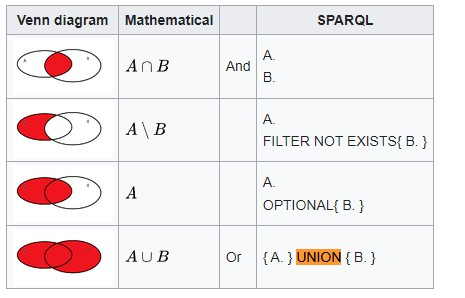